In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('cars-dataset.csv')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
df = df.replace('?', np.nan)
df = df.dropna()

In [4]:
car_df=df.drop('car name', axis=1)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
cyl     392 non-null int64
disp    392 non-null float64
hp      392 non-null object
wt      392 non-null int64
acc     392 non-null float64
yr      392 non-null int64
mpg     392 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [6]:
car_df['hp'] = car_df['hp'].astype('float64')

In [7]:
car_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


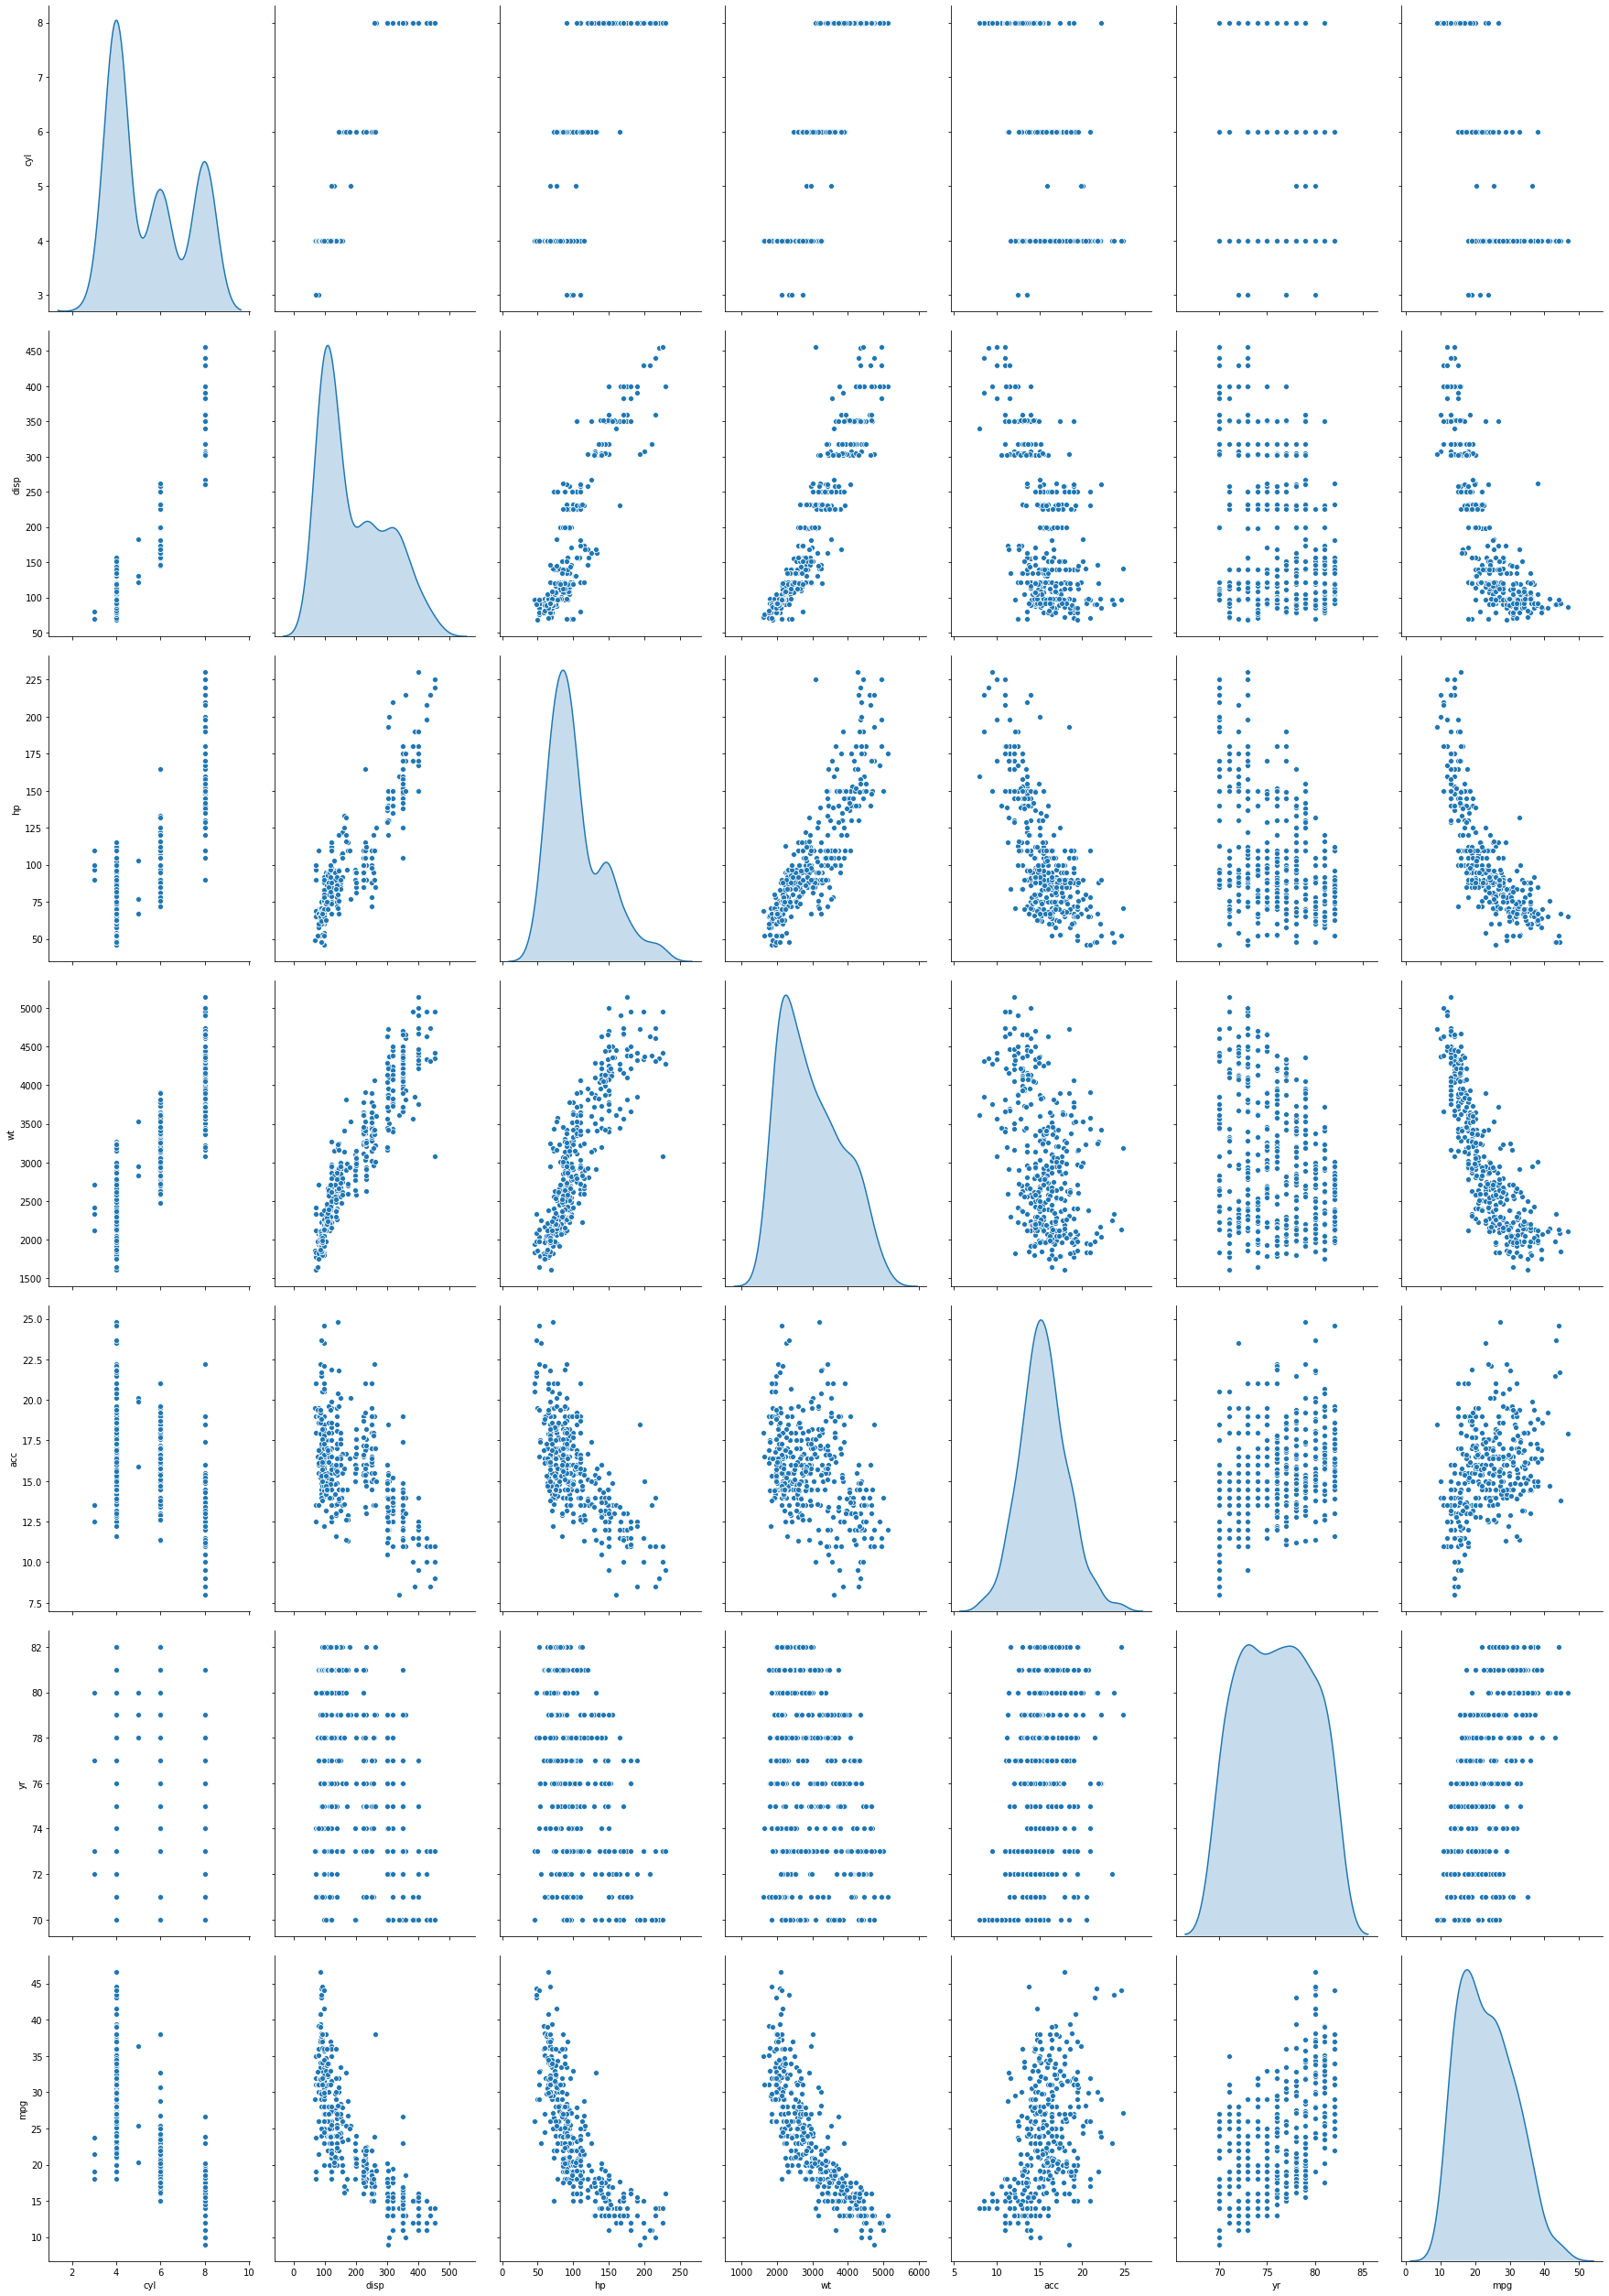

In [8]:
sns.pairplot(car_df, diag_kind='kde',size=5,aspect=0.7)

Text(0, 0.5, 'mpg')

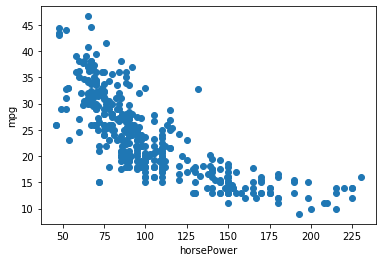

In [9]:
plt.scatter(car_df.hp, car_df.mpg, )
plt.xlabel('horsePower')
plt.ylabel('mpg')

In [10]:
from scipy.stats import zscore
car_df_z = car_df.apply(zscore)

In [11]:
cluster_range = range(2, 12) 
cluster_errors = []
cluster_sil_scores = []
for cluster_num in cluster_range:
    clusters = KMeans( cluster_num, n_init = 5)
    model=clusters.fit(car_df_z)#First we need to
    labels = clusters.labels_# capture the cluster lables
    centroids = clusters.cluster_centers_ # capture the centroids
    cluster_errors.append( model.inertia_ )# capture the intertia
    cluster_sil_scores.append(metrics.silhouette_score(car_df_z, labels, metric='euclidean'))
clusters_df = pd.DataFrame( { "cluster_num":cluster_range, "cluster_errors": cluster_errors, "Avg Sil Score": cluster_sil_scores } )
clusters_df 
# combine the cluster_range and cluster_errors into a dataframe by combining them

,cluster_num,cluster_errors,Avg Sil Score
0,2,1272.900760,0.481209
1,3,928.617487,0.354494
2,4,725.327184,0.348754
3,5,656.444619,0.334029
4,6,587.375124,0.276912
5,7,538.099653,0.263860
6,8,490.287337,0.270055
7,9,457.085426,0.264196
8,10,417.218345,0.263295
9,11,398.606617,0.265900


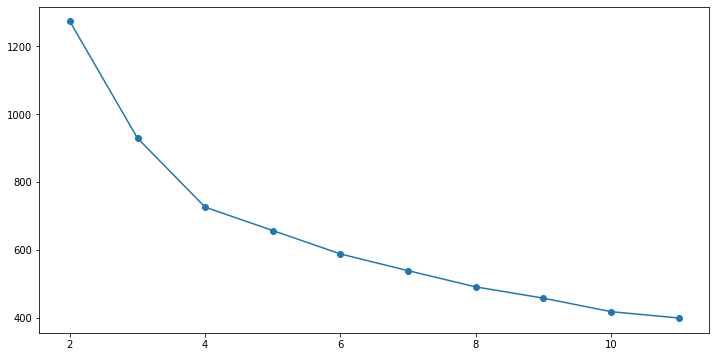

In [12]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.cluster_num, clusters_df.cluster_errors, marker = "o" )

In [13]:
#k=1, highest level of inertia
#k=2,3 drop in inertia..and slopes are also almost same
#but gradually it nears to straight line from where optimization begins. 
#The most appropriat evalue of k is 5, all the inertia is nearby related 6, 7, 8 and so on

In [14]:
cluster = KMeans( n_clusters = 4, random_state = 2 )
cluster.fit(car_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [15]:
# Centroids are essential while doing Kmeans++ analysis. this give sthe distance of each data point from it. Next clusters 
#are formed with the nearest data points to form clusters
#Here we are using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[ 1.48394702,  1.48913886,  1.50679413,  1.39145217, -1.0759934 ,
        -0.68265368, -1.1566489 ],
       [-0.83170217, -0.79320521, -0.75919461, -0.78782597,  0.38355974,
         1.1127382 ,  1.21012512],
       [ 0.41549305,  0.30031222, -0.03530064,  0.34141577,  0.30633818,
         0.06662814, -0.49265912],
       [-0.85814365, -0.80247472, -0.55744679, -0.75309477,  0.3207127 ,
        -0.63048922,  0.2066802 ]])

In [16]:
# Let us put the raw centroid values into a dataframe under respective columns****Getting clusters****

centroid_df = pd.DataFrame(centroids, columns = list(car_df_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-1.156649
1,-0.831702,-0.793205,-0.759195,-0.787826,0.383560,1.112738,1.210125
2,0.415493,0.300312,-0.035301,0.341416,0.306338,0.066628,-0.492659
3,-0.858144,-0.802475,-0.557447,-0.753095,0.320713,-0.630489,0.206680


In [17]:
prediction=cluster.predict(car_df_z)
car_df_z["group"] = prediction

In [18]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. T
#This means that if the clusters are loose and near to each other, the analysis may go wrong
#We have to have tight clusters and distant from each other for appropriate analysis
car_df_z.groupby("group").count()

,cyl,disp,hp,wt,acc,yr,mpg
group,,,,,,,
0,94,94,94,94,94,94,94
1,109,109,109,109,109,109,109
2,89,89,89,89,89,89,89
3,100,100,100,100,100,100,100


In [19]:
car_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acc,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
yr,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


In [20]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = car_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_df[['mpg']]


In [28]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [29]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Let us explore the coefficients for each of the independent attributes

for id_col, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][id_col]))

The coefficient for cyl is -0.02095831833525245
The coefficient for disp is 0.0070418044435968385
The coefficient for hp is 0.011610254359575498
The coefficient for wt is -0.007459986467688244
The coefficient for acc is 0.25147337663607666
The coefficient for yr is 0.7511697786096578


In [31]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -17.873263838158568


In [32]:
regression_model.score(X_train, y_train)

0.8050707343068906

In [33]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8118279486147426

In [27]:
# So the model explains 82% (nearly) of the variability in Y using X